# Segmentation
Select threshold to segment breast tissue from the background of an image.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import skimage
from skimage import io
import glob

import sklearn
from scipy.ndimage import gaussian_filter

## Background segmentation

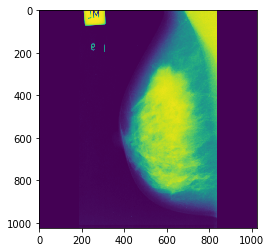

In [3]:
## Read in two mammo images: 
dense = io.imread('dense/mdb003.pgm')
fatty = io.imread('fatty/mdb005.pgm')

plt.imshow(dense)

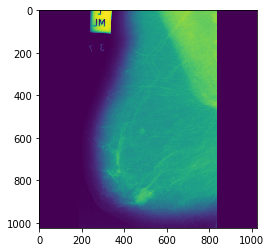

In [4]:
plt.imshow(fatty)

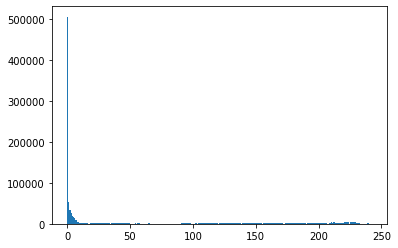

In [5]:
x = plt.hist(dense.ravel(),bins=256)

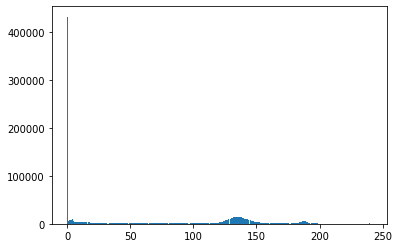

In [6]:
x = plt.hist(fatty.ravel(),bins=256)

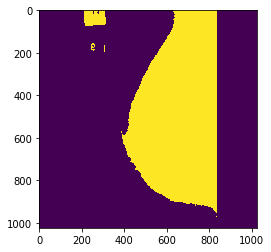

In [8]:
## Implement two cut-off intensity thresholds to segment the background 
thresh = 50
dense_bin = (dense > thresh) * 255
fatty_bin = (fatty > thresh) * 255

plt.imshow(dense_bin)

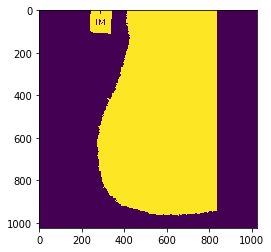

In [9]:
plt.imshow(fatty_bin)

Reasonable segmentation

### Use the chosen threshold to classify dense, fatty tissue

In [19]:
thresh = 50
fatty_imgs = glob.glob("fatty/*")
dense_imgs = glob.glob("dense/*")

In [11]:
fatty_intensities = []

for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    fatty_intensities.extend(img[img_mask].tolist())

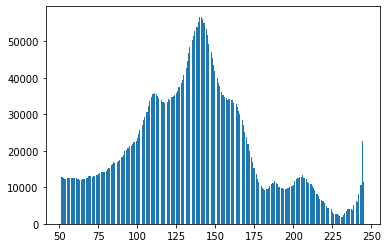

In [12]:
x = plt.hist(fatty_intensities,bins=256)

In [13]:
dense_intensities = []

for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    dense_intensities.extend(img[img_mask].tolist())

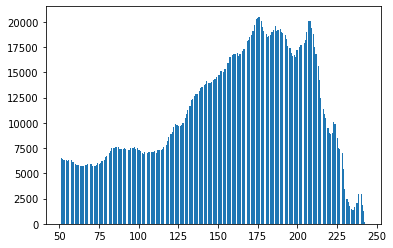

In [14]:
x = plt.hist(dense_intensities,bins=256)

In [15]:
scipy.stats.mode(fatty_intensities)[0][0]

140

In [16]:
scipy.stats.mode(dense_intensities)[0][0]

176

In [17]:
for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Fatty
Fatty
Fatty
Dense
Dense
Dense
Fatty
Fatty
Fatty
Fatty


In [18]:
for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense


Get 100% accuracy on dense images and 70% accuracy on fatty images